In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Гаусовский процесс

* $X_t$ -- Гаусовский процесс, если $(X_{t_1} , X_{t_2} ,.. ,X_{t_n} )$ -- гаусовский вектор для любого разбиения.

* Гаусовский процесс однозначно определен своими $M_X(t) ,R_X(t,s)$

1. $R_X(t,s) = R_X(s,t)$
2. Неотр. определ. у $R_X(t,s)$ : $\sum R_X(t_i ,t_j) z_i \overline{z_j} \ge 0$
3. Кстати, если $R(t,s)$ -- неотр. определена, то явл корелл для некоторого процесса. (Для хар функций неотр опр. похожая : $R(t_i,t_j) \rightarrow \varphi(t_i - t_j)$)
4. Проверить $R(t,s) = e^{-|t-s|}$ на корр функцию можно, проверив, что $\varphi(t) = e^{-|t|} $ -- ХФ для некотрой с.в. (распр. Коши)

## Винеровский процесс
* Опр 1: Это Гаусовский процесс с $\mathbb{E} W_t = 0 $ и $R_W(t,s) = \min(t,s)$
* Опр 2: Это Гаусовский процесс с $\mathbb{E} W_t = 0 $ и $\mathbb{E} (W_t - W_s)^2 = |t - s |$

### Свойства:
1. $W_t$ -- имеет стац. приращения ($y_t = W_{t_0 + t } - W_{t_0}$ тоже В.П.)
2. С независимыми приращениями
3. $\mathbb{E} ((W_{t_2} - W_{t_1}) W_{t_1}) = 0$
4. Самоподобен с коэффициентом $\alpha = - \frac{1}{2}$ ($y_t = W_{ct}\cdot c^\alpha$ - тоже В.П. , $R_y(t,s) = c^{2\alpha}R_W(ct,cs) = c^{2\alpha + 1} R_W(t,s) \rightarrow
 \alpha = -\frac{1}{2}$)  
5. Допускает инверсию времени : $y_t = t W_{\frac{1}{t}}$ ($R_y(t,s) = ts \min (\frac{1}{t} , \frac{1}{s}) = \min(t,s) = R_W(t,s)$)
6. $W_0 = 0$ п.в.
7. $W_t \sim \mathcal{N}(0 ,t) $ и $W_t - W_s \sim \mathcal{N} (0 , |t -s | )$
8. Траектория $W_t$ с $\mathbb{P} = 1$ -- непрерывная и нигде не дифферецнируемая.
9. З-н потворного логарифма Леви: с $\mathbb{P} = 1 \rightarrow \overline{\lim}\frac{W_t}{\sqrt{2t \log \log t}} = 1 $ и $\underline{\lim}\frac{W_t}{\sqrt{2t \log \log t}} = 1$  

In [54]:
def weiner_process(   t_array  ,mean = 1) :
    size = len(t_array)
    X = np.zeros(size)
    X[0] = np.random.normal(loc = 0 , scale = np.sqrt(t_array[0]))
    delta_t = t_array[1:] - t_array[:-1]
    delta_X = np.random.normal(loc = 0 , scale = np.sqrt(np.abs(delta_t)))
    X[1:] = np.cumsum(delta_X)
    return X*mean

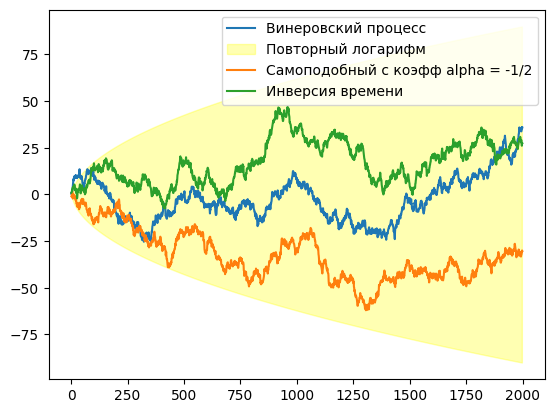

In [87]:
t_array = np.arange(1,2000)
process = weiner_process(t_array)
plt.plot(t_array , process , label ='Винеровский процесс')


t_arr_2 = np.arange( 3,t_array[-1] , (t_array[-1] - 1.001 )/500 )
y_arr_1 = np.sqrt(2*t_arr_2*np.log(np.log(t_arr_2)))
y_arr_2 = - y_arr_1
plt.fill_between(t_arr_2, y_arr_1, y_arr_2, color='yellow', alpha=0.3 , label ='Повторный логарифм')


c = 6
y = weiner_process(t_array*c)*c**(-0.5)
plt.plot(t_array , y , label ='Самоподобный с коэфф alpha = -1/2')


new_t = np.concatenate([np.zeros(1), 1/t_array[::-1]])
y = ( t_array[::-1] * weiner_process(new_t)[1:] )[::-1]
plt.plot(t_array , y , label ='Инверсия времени')

plt.legend()
plt.show()

* Процесс не дифференцируемый :

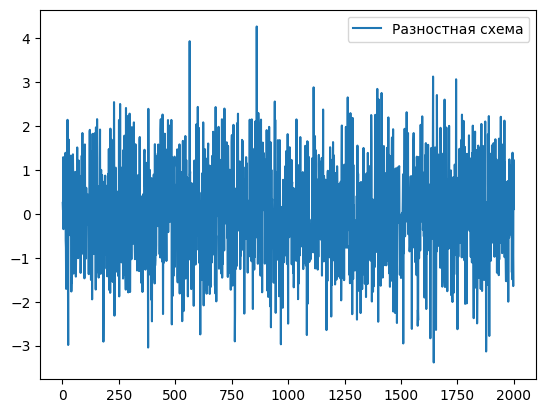

In [88]:
plt.plot(t_array[1:] , y[1:]-y[:-1] , label ='Разностная схема')
plt.legend()
plt.show()